In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

### Import Dataset

In [58]:
df = pd.read_excel('../../data_set/hd_sessions/data_labeled.xlsx')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Subject_ID           3856 non-null   object        
 1   Session_No           3856 non-null   object        
 2   Date                 3843 non-null   datetime64[ns]
 3   AP (mmHg)            3856 non-null   float64       
 4   AUF (ml)             3856 non-null   float64       
 5   BFR (ml/min)         3856 non-null   float64       
 6   Dry weight (kg)      3856 non-null   float64       
 7   HD duration (h)      3856 non-null   float64       
 8   PUF (ml)             3856 non-null   float64       
 9   Post HD weight (kg)  3856 non-null   float64       
 10  Pre HD weight (kg)   3856 non-null   float64       
 11  TMP (mmHg)           3856 non-null   float64       
 12  VP (mmHg)            3856 non-null   int64         
 13  Weight gain (kg)     3856 non-nul

### Preprocess Dataset

In [60]:
df = df.drop(['Subject_ID', 'Session_No', 'Date'], axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AP (mmHg)            3856 non-null   float64
 1   AUF (ml)             3856 non-null   float64
 2   BFR (ml/min)         3856 non-null   float64
 3   Dry weight (kg)      3856 non-null   float64
 4   HD duration (h)      3856 non-null   float64
 5   PUF (ml)             3856 non-null   float64
 6   Post HD weight (kg)  3856 non-null   float64
 7   Pre HD weight (kg)   3856 non-null   float64
 8   TMP (mmHg)           3856 non-null   float64
 9   VP (mmHg)            3856 non-null   int64  
 10  Weight gain (kg)     3856 non-null   float64
 11  SYS (mmHg)           3856 non-null   float64
 12  DIA (mmHg)           3856 non-null   float64
 13  target               3856 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 421.9 KB


#### Separate x and y

In [62]:
X = df.drop(['target', 'SYS (mmHg)'], axis=1)
y = df['target']

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
X_scaled

array([[-8.29567035e-01, -1.56235202e+00, -8.84746670e-01, ...,
        -2.57421005e-01, -7.63500196e-01, -8.52004912e-01],
       [-1.35415713e+00,  6.01539558e-01, -1.34676335e+00, ...,
         7.10373311e-01,  6.42112961e-01, -1.12687050e+00],
       [-1.40411809e+00,  3.19292830e-01, -8.84746670e-01, ...,
        -3.42814621e-01,  1.73575242e-01, -6.87085559e-01],
       ...,
       [ 2.44593628e-01, -2.23006145e-05,  2.70295036e-01, ...,
        -5.70530930e-01,  4.85933721e-01, -3.57246853e-01],
       [ 2.94554590e-01, -2.23006145e-05,  2.70295036e-01, ...,
        -1.43562850e-01,  4.85933721e-01, -4.67193089e-01],
       [ 7.44203239e-01,  3.19292830e-01,  2.70295036e-01, ...,
        -3.71279159e-01,  3.29754481e-01, -4.67193089e-01]])

In [65]:
# X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, stratify=y, random_state=42 )
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42 )

In [75]:
# Check imbalance
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())

Class distribution in training set:
target
0    3073
1      11
Name: count, dtype: int64


#### Apply SMOTE

In [76]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

### Train XGBoost model

In [77]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    use_label_encoder=False,
    scale_pos_weight=10,  # optional: help with imbalance if not using SMOTE
    random_state=42
)

In [78]:
model.fit(X_train, y_train)
#model.fit(X_train_bal, y_train_bal)

C:\Users\Lakshitha Kaveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Prediction

In [79]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

### Evaluation

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Average Precision Score (AUC-PR):", average_precision_score(y_test, y_proba))

Accuracy: 0.9974093264248705

Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987       769
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.9974       772
   macro avg     0.8327    0.8327    0.8327       772
weighted avg     0.9974    0.9974    0.9974       772

ROC AUC Score: 0.9995665366276549
Average Precision Score (AUC-PR): 0.9166666666666665


In [81]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[768   1]
 [  1   2]]


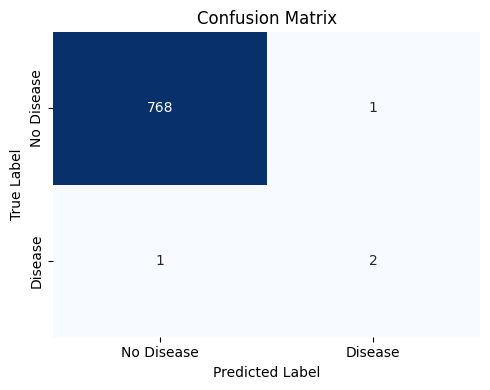

In [82]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

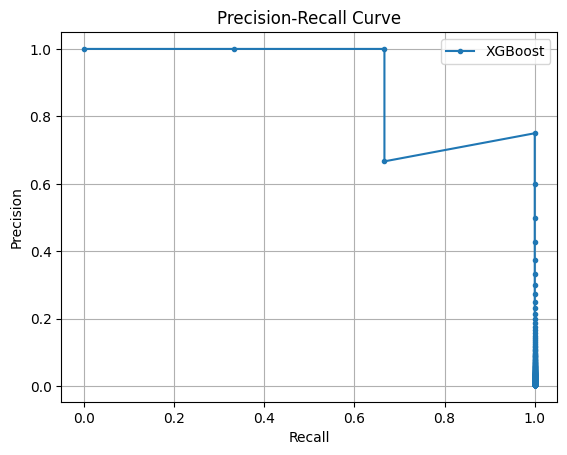

In [74]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()